Bath Plate Model    holes: 2    Thickness: 0.00635
boxx=  0.15  boxy=  0.2  boxz=  0.2
div_thick=  1
name: conductor   mass: 2.6669999999999994e-05   center: (0, 2.1808e-20, -2.46491e-21)
name: air   mass: 0.00017348625000000007   center: (0, -4.55112e-19, 2.91247e-20)
name: reduced_region   mass: 0.013937010691154068   center: (-1.097e-17, -6.63002e-18, 2.51314e-17)
name: Kelvin   mass: 0.014137166941154067   center: (0.375, -8.2821e-18, 1.96015e-17)
conductive_region: conductor
Conductor boundary: conductor_boundary
{'conductor': 32780000.0, 'air': 0, 'reduced_region': 0, 'Kelvin': 0, 'default': 0}
{'conductor': 1.2566370614359173e-06, 'air': 1.2566370614359173e-06, 'reduced_region': 1.2566370614359173e-06, 'Kelvin': 1.2566370614359173e-06, 'default': 1.2566370614359173e-06}
class HolePot: num= 0  holes
class MeasureFace: num= 0  faces


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

enter iccg_solve
Dof= 884    Nonzeros= 14897
shift parameter= 1.0
minimum residual= 2.507965407402802e-13  at iteraions:  29


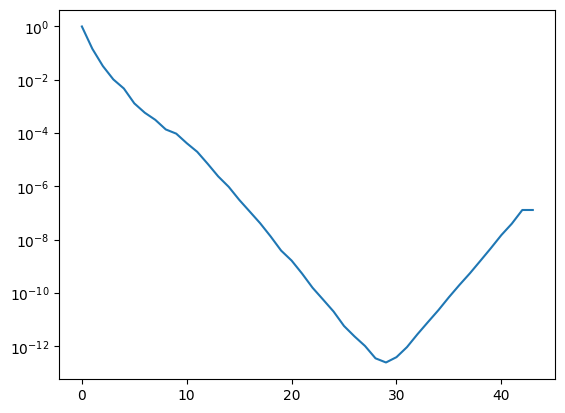

ICCG calculation time (sec): 0.001783400002750568
enter iccg_solve
Dof= 24743    Nonzeros= 1309058
shift parameter= 5.009999999999937
minimum residual= nan  at iteraions:  0


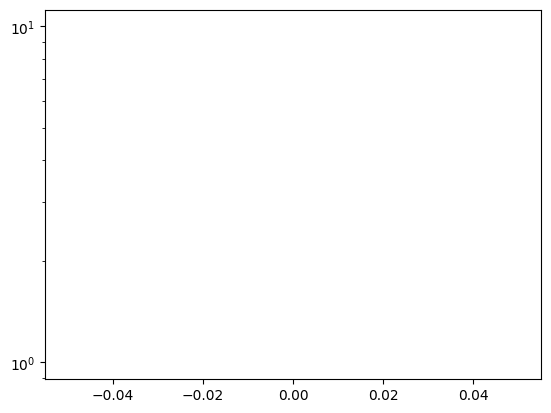

ICCG calculation time (sec): 10.899651599989738
center magnetic field =  (0j, 0j, 0j)   
 Average magnetic energy in conductor= nan  Average Joule loss=  nan
**** B field (real)****


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

**** B field (imag)****


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

**** J field (real)****


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

**** J field (imag)****


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

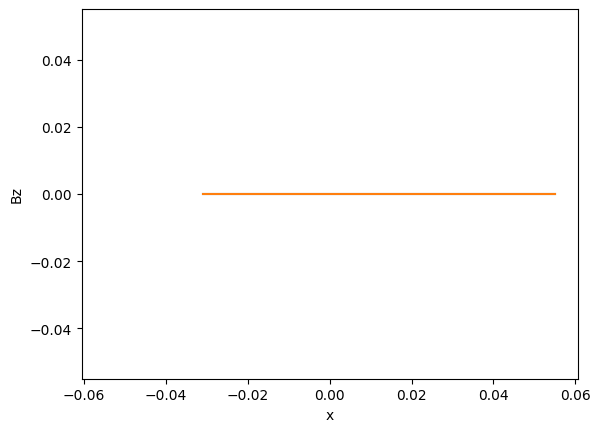

経過時間: 13.1313 秒  


1

In [1]:
from ngsolve import *
from netgen.occ import *
from ngsolve.webgui import Draw
from netgen.webgui import Draw as DrawGeo  
sys.path.append(r'..\Static') 
from Omega_ReducedOmega import Omega_ReducedOmega_Method
from A_ReducedOmega import A_ReducedOmega_Method
from A_ReducedA import A_ReducedA_Method
from A_Phi_ReducedA import A_Phi_ReducedA_Method
sys.path.append(r'..\bin\Release') 
from EMPY_Field import *
sys.path.append(r'..\model')
#from SphereMesh import SphereMesh
from BathPlateModel import BathPlateModel
from Team7Model import Team7Model

#coil=UNIF(0,0,1,0)
#model=CubeMesh(msize=meshsize.coarse, curveOrder=3, rKelvin=5)
#model=SphereMesh(mur=1, sigma=5.e7, msize=meshsize.coarse, curveOrder=3, rKelvin=8)
model=BathPlateModel(holes=2, outerBox="sphere", boxx=0.2, boxy=0.2, boxz=0.2,  msize=meshsize.very_coarse, sigma=0.3278e8, rKelvin=0.15)
#model=Team7Model()
mesh=model.mesh
Draw(mesh)
#DrawGeo(model.geo)
#model.AppliedField()

feOrder=3
#cal=Omega_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0", Kelvin="on")
cal=A_Phi_ReducedA_Method(model, jomega=True, freq=50)
cal.Calc( feOrder=feOrder, Kelvin="off", boundaryCD="Bn0")
#maxerror, error=cal.CalcError()
#cal.CalcError()


In [2]:
"""
iter=0
#for iter in range(6):
while True:
    iter=iter+1
    print("Adaptive iteration: ",iter) 
    maxerror, error=cal.CalcError()
    cal.Refine(maxerror, error)
    Draw(mesh)
    cal=A_Phi_ReducedA_Method(model, jomega=True, freq=50)
    rt=cal.Calc(feOrder=feOrder, Kelvin="on", boundaryCD="Bn0")
    if rt==0: break
    #cal=Omega_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")
"""

'\niter=0\n#for iter in range(6):\nwhile True:\n    iter=iter+1\n    print("Adaptive iteration: ",iter) \n    maxerror, error=cal.CalcError()\n    cal.Refine(maxerror, error)\n    Draw(mesh)\n    cal=A_Phi_ReducedA_Method(model, jomega=True, freq=50)\n    rt=cal.Calc(feOrder=feOrder, Kelvin="on", boundaryCD="Bn0")\n    if rt==0: break\n    #cal=Omega_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")\n'

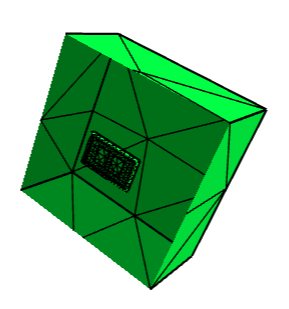
